In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mse-2-ai-201-b-aiml-c/sample_submission.csv
/kaggle/input/mse-2-ai-201-b-aiml-c/train.csv
/kaggle/input/mse-2-ai-201-b-aiml-c/test.csv


In [2]:
import pandas as pd 
import numpy as np
train=pd.read_csv('/kaggle/input/mse-2-ai-201-b-aiml-c/train.csv')
test=pd.read_csv('/kaggle/input/mse-2-ai-201-b-aiml-c/test.csv')

In [3]:
train.isnull().sum()

Area                 170
Perimeter            275
Major_Axis_Length    248
Minor_Axis_Length    233
Convex_Area          150
Equiv_Diameter       133
Eccentricity         109
Solidity             270
Extent               224
Roundness            252
Aspect_Ration         97
Compactness          286
Class                272
dtype: int64

In [4]:
train=train.drop_duplicates()
train=train.dropna(subset='Class')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1517 entries, 0 to 1749
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               1386 non-null   float64
 1   Perimeter          1296 non-null   float64
 2   Major_Axis_Length  1326 non-null   float64
 3   Minor_Axis_Length  1349 non-null   float64
 4   Convex_Area        1414 non-null   float64
 5   Equiv_Diameter     1415 non-null   float64
 6   Eccentricity       1436 non-null   float64
 7   Solidity           1306 non-null   float64
 8   Extent             1350 non-null   float64
 9   Roundness          1339 non-null   float64
 10  Aspect_Ration      1436 non-null   float64
 11  Compactness        1290 non-null   float64
 12  Class              1517 non-null   object 
dtypes: float64(12), object(1)
memory usage: 165.9+ KB


In [6]:
X=train.drop("Class",axis=1)
y=train["Class"]

In [7]:
num=X.select_dtypes(exclude='object').columns
cat=X.select_dtypes(include='object').columns


In [8]:
from sklearn.impute import SimpleImputer
nums=SimpleImputer(strategy='mean')
cats=SimpleImputer(strategy='most_frequent')

In [9]:
X[num]=nums.fit_transform(X[num])
test[num]=nums.transform(test[num])


In [10]:
from sklearn.preprocessing import OrdinalEncoder
encode=OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
X[cat]=encode.fit_transform(X[cat])
test[cat]=encode.transform(test[cat])

In [11]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X[num]=scale.fit_transform(X[num])
test[num]=scale.transform(test[num])

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

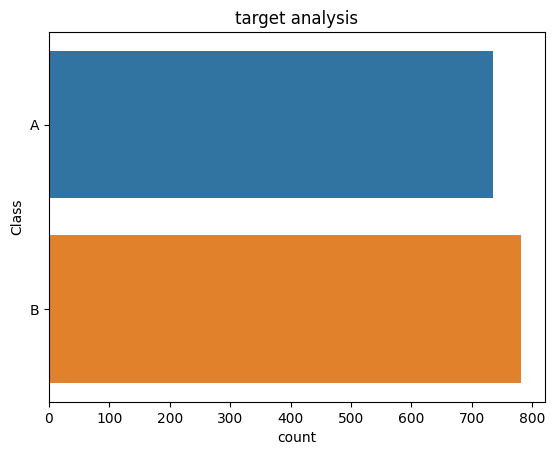

In [13]:
sns.countplot(y=train["Class"])
plt.title("target analysis")
plt.show()

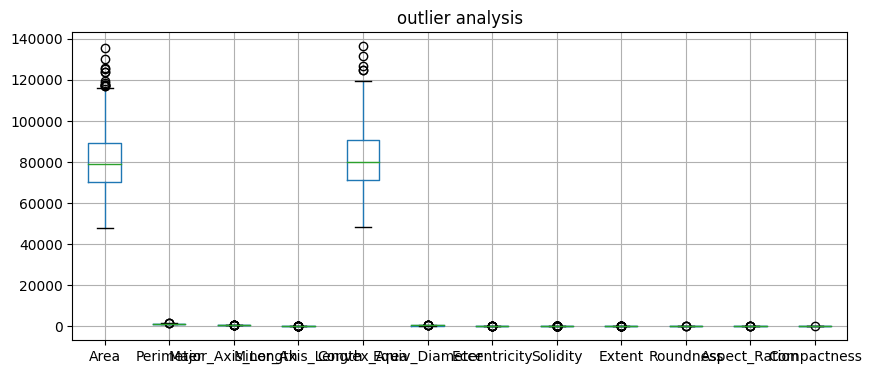

In [14]:
train[num].boxplot(figsize=(10,4))
plt.title("outlier analysis")
plt.show()

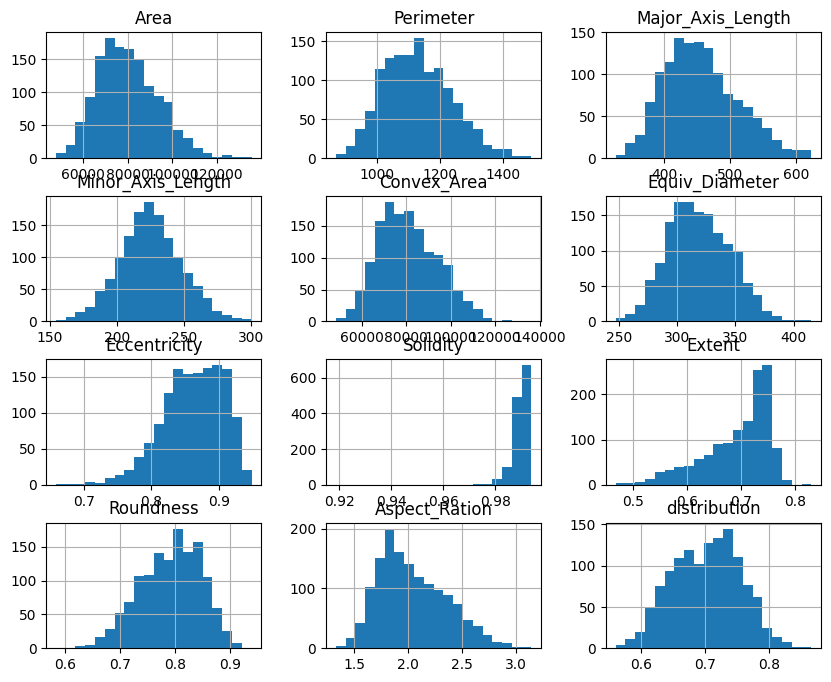

In [15]:
train[num].hist(bins=20,figsize=(10,8))
plt.title("distribution")
plt.show()

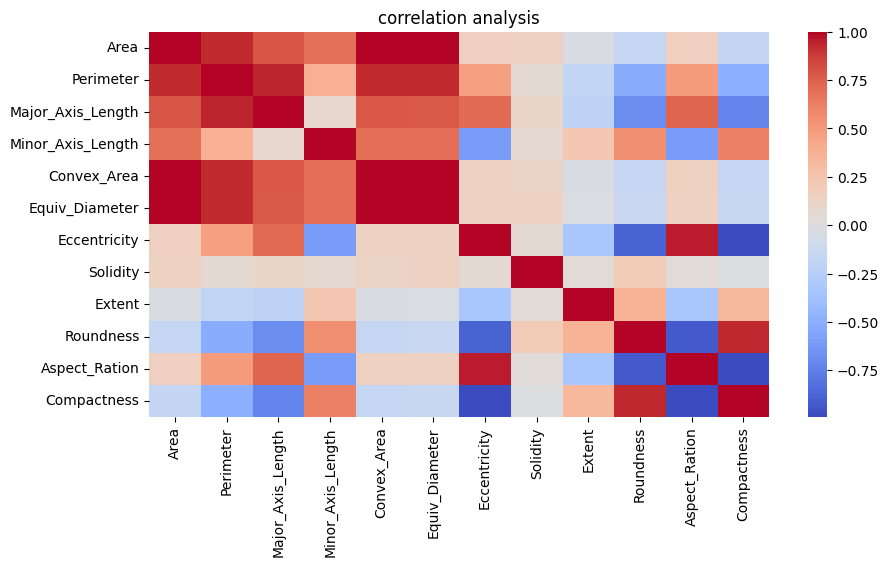

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(train[num].corr(),cmap="coolwarm")
plt.title("correlation analysis")
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=500,random_state=42)
model.fit(X,y)

RandomForestClassifier(n_estimators=500, random_state=42)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
#hypertunning using random forest 

from sklearn.metrics import accuracy_score
best_model=None
best_acc=0
trees=[300,400,500]
depth=[None,20,30]

for t in trees:
    for d in depth:
        newmodel=RandomForestClassifier(n_estimators=t,max_depth=d,random_state=42)
        newmodel.fit(X_train,y_train)
        fut=newmodel.predict(X_val)
        acc=accuracy_score(y_val,fut)
        print(f"tunning->estimators={t},depth={d},accuracy={acc}")
        if acc>best_acc:
            best_acc=acc
            best_model=newmodel
print("best_accuracy",best_acc)

tunning->estimators=300,depth=None,accuracy=0.868421052631579
tunning->estimators=300,depth=20,accuracy=0.8651315789473685
tunning->estimators=300,depth=30,accuracy=0.868421052631579
tunning->estimators=400,depth=None,accuracy=0.875
tunning->estimators=400,depth=20,accuracy=0.875
tunning->estimators=400,depth=30,accuracy=0.875
tunning->estimators=500,depth=None,accuracy=0.875
tunning->estimators=500,depth=20,accuracy=0.875
tunning->estimators=500,depth=30,accuracy=0.875
best_accuracy 0.875


In [20]:
#normal model accuracy
pred=model.predict(X_val)
print("accuracy",accuracy_score(y_val,pred))

accuracy 1.0


In [21]:
#best model model accuracy
predu=best_model.predict(X_val)
print("accuracy",accuracy_score(y_val,predu))

accuracy 0.875


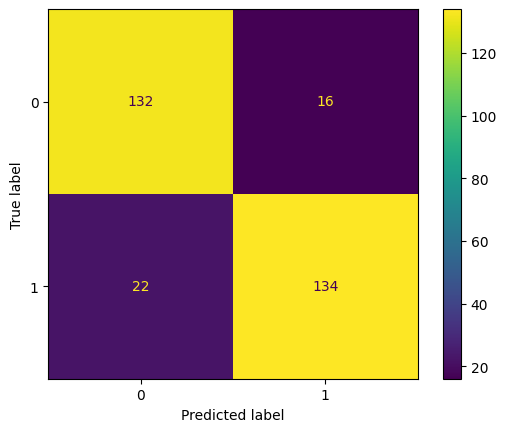

In [22]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(predu,y_val)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [23]:
#prediction
X_test=test.drop("id",axis=1)
prediction=best_model.predict(X_test)

In [24]:
submission=pd.DataFrame({
    "id":test["id"],
    "Class":prediction
})
submission.to_csv("final_submission.csv",index=False)